# Workshop name

**Author:** Martin Beneš, Verena Lachner

<div style="text-align: center">
<img src="https://www.uibk.ac.at/media/filer_public/00/c3/00c369ba-9e7a-42a4-9f73-466c81dc951a/universitaet-innsbruck-logo-cmyk-farbe.jpg" style="height: 5em; display: inline; padding-right: 2em" />
<img src="https://www.uncoverproject.eu/wp-content/uploads/2021/05/UNCOVER-Logog-440x92.5-final-1.0.png" style="height: 4em; display: inline; padding-left: 2em" />
</div>

<div style="text-align: center">
<a href="https://www.github.com/uibk-uncover/mip-stego-demo">
github.com/uibk-uncover/mip-stego-demo
</a>
</div>

## Notebook setup

For this notebook, we will use a sample image `00001.tif` from ALASKA database. Run following code chunk to download it.

In [1]:
# download 00001.tif from ALASKA website
import requests
res = requests.get('http://alaska.utt.fr/DATASETS/ALASKA_v2_TIFF_512_COLOR/00001.tif', verify=False)
with open('00001.tif', 'wb') as f:
    f.write(res.content)

/opt/miniconda3/envs/dev/lib/python3.8/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'alaska.utt.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)

## A matrix is a grid of numbers.

We create a matrix with 3 rows and 4 columns.

In [3]:
import numpy as np
matrix = np.array([
    [  0,  20,  40,  60],
    [ 80, 100, 120, 140],
    [160, 180, 200, 220],
], dtype='uint8')

In [4]:
matrix.shape

(3, 4)

## An image is a matrix.

In [5]:
matrix

array([[  0,  20,  40,  60],
       [ 80, 100, 120, 140],
       [160, 180, 200, 220]], dtype=uint8)

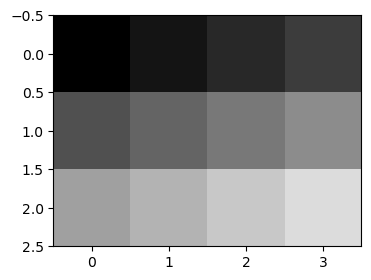

In [6]:
import matplotlib.pyplot as plt
plt.imshow(matrix, cmap='gray', vmin=0, vmax=255);

## Our eyes don't distinguish very close colors.

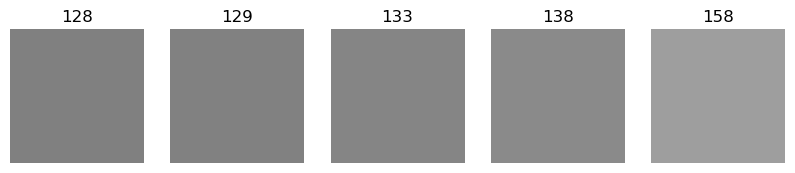

In [7]:
fig, ax = plt.subplots(1, 5, sharey=True)
for i, v in enumerate([0, 1, 5, 10, 30]):
    ax[i].imshow([[128+v]], vmin=0, vmax=255, cmap='gray');
    ax[i].set_title(f'{128+v}');
    ax[i].axis('off');

This will be important later for the steganography ...

## An image can be saved into a file ...

In [8]:
from PIL import Image
im_matrix = Image.fromarray(matrix)

In [9]:
im_matrix.save('image.png')

## ... and loaded from a file again.

In [10]:
im2_matrix = Image.open('image.png')

In [11]:
matrix2 = np.array(im2_matrix)

## It will stay the same.

In [12]:
(matrix == matrix2).all()

True

## ... at least for lossless formats.

- PNG
- TIFF
- PPM
- ...

## Let's play with real images.

In [13]:
im = Image.open('../img/girls.jpeg')  # load image
cover = np.array(im.convert('L'))  # PIL to numpy

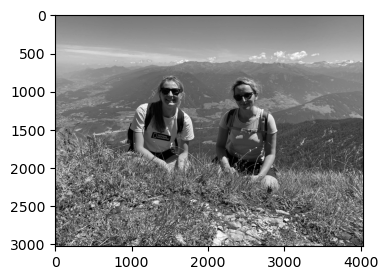

In [14]:
plt.imshow(cover, cmap = "gray");

In [15]:
cover.shape

(3024, 4032)

## Image can be cropped.

In [16]:
cover_crop = cover[800:1200, 1300:1700]  # row 800-1200, column 1300-1700

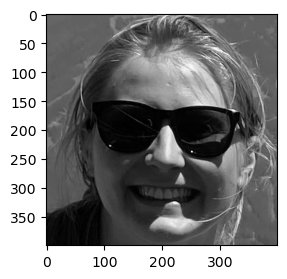

In [17]:
plt.imshow(cover_crop, vmin=0, vmax=255, cmap='gray');

## Image can be modified.

In [18]:
cover_crop_180 = np.rot90(cover_crop, k=2)  # rotate crop by 180

In [19]:
cover[800:1200, 1300:1700] = cover_crop_180  # put the rotated crop back

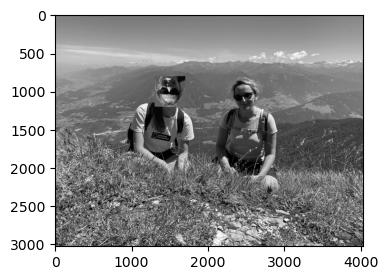

In [20]:
plt.imshow(cover, cmap = "gray");

## Hands-on: Image processing

- Censor people's faces by blackout


In [21]:
cover[800:1200, 1300:1700] = 0  # Kamila

In [22]:
cover[800:1250, 2300:2700] = 0  # Magda

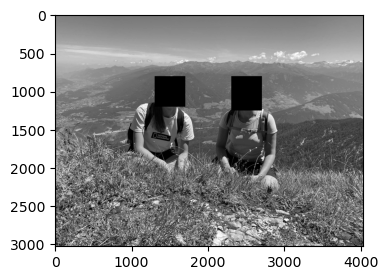

In [23]:
plt.imshow(cover, cmap='gray');

## Take-out

- Grayscale image is a matrix of pixel values.
- $\pm1$ changes are imperceptible.
- In Python, you can use `pillow` and `matplotlib` to process images.